# **Impact of Covid-19 on Unemployment in India**

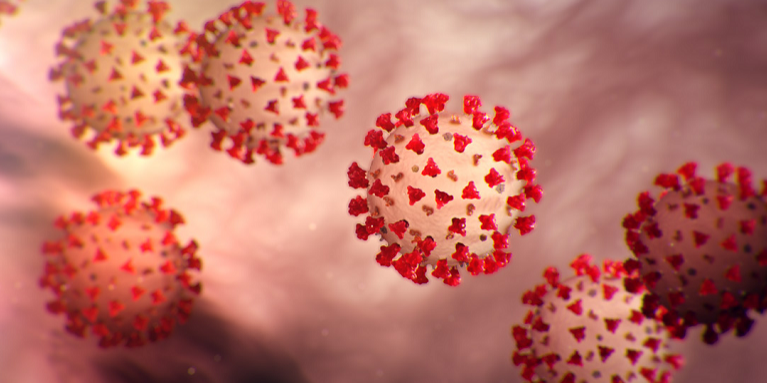

## **Author: Adarsh S. Vimal**

- [LinkedIn](https://www.linkedin.com/in/adarshsvimal/)
- [GitHub](https://github.com/asvcodes)
- [Kaggle](https://www.kaggle.com/adarshshamshervimal)

## **Objective**:

The central focus of this analysis is to assess the impact of the COVID-19 pandemic on India's job market using exploratory data analysis techniques.

## **Dataset Details**:

Sources:  
- https://unemploymentinindia.cmie.com/
- https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india

The dataset provides insights into the unemployment scenario across different Indian states:

- States: The states within India.
- Date: The date when the unemployment rate was recorded.
- Measuring Frequency: The frequency at which measurements were taken (Monthly).
- Estimated Unemployment Rate (%): The percentage of individuals unemployed in each state of India.
- Estimated Employed Individuals: The count of people currently employed.
- Estimated Labour Participation Rate (%): The proportion of the working population (age group: 16-64 years) participating in the labor force, either employed or actively seeking employment.

## Task

- Conduct an in-depth analysis of unemployment trends across Indian states over time, with a specific emphasis on monthly data.

- Explore the factors influencing unemployment rates and delve into variations in labor participation and employment levels.

- Discern any valuable pattern between the features of the dataset

In [1]:
# Importing the required libraries and customizing them

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import calendar
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")


pd.options.display.max_columns=50
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = '#00000000'

## **Data Loading, Exploration & Wrangling**

In [2]:
# Load the datasets and merge them to create a comprehensive dataframe

RawData1 = pd.read_csv(r'Datasets\Unemployment in India.csv')
RawData2 = pd.read_csv(r'Datasets\Unemployment_Rate_upto_11_2020.csv')

RawData1.columns = [ str.strip(i) for i in RawData1.columns]
RawData2.columns = [str.strip(i) for i in RawData2.columns]

In [3]:
RawData1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [4]:
RawData2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [5]:
# Remove Null Values for merge
RawData1.dropna(inplace = True)

In [6]:
# Correct Date dtype for effective merge
RawData1['Date'] = pd.to_datetime(RawData1['Date'])
RawData2['Date'] = pd.to_datetime(RawData2['Date'])

In [7]:
# Merge the two dataframes
df = RawData1.merge(RawData2,how='left',on=['Region','Date'],sort=True)
df = df[['Region', 'Date', 'Estimated Unemployment Rate (%)_x',
       'Estimated Employed_x', 'Estimated Labour Participation Rate (%)_x',
       'Estimated Unemployment Rate (%)_y', 'Estimated Employed_y',
       'Estimated Labour Participation Rate (%)_y', 'Region.1','Area']]
df

,Region,Date,Estimated Unemployment Rate (%)_x,Estimated Employed_x,Estimated Labour Participation Rate (%)_x,Estimated Unemployment Rate (%)_y,Estimated Employed_y,Estimated Labour Participation Rate (%)_y,Region.1,Area
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,NaN,NaN,NaN,NaN,Rural
1,Andhra Pradesh,2019-05-31,6.09,4788661.0,37.45,NaN,NaN,NaN,NaN,Urban
2,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,NaN,NaN,NaN,NaN,Rural
3,Andhra Pradesh,2019-06-30,3.80,4824630.0,36.76,NaN,NaN,NaN,NaN,Urban
4,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,NaN,NaN,NaN,NaN,Rural
...,...,...,...,...,...,...,...,...,...,...
735,West Bengal,2020-04-30,15.63,9299466.0,41.20,17.41,26938836.0,39.90,East,Urban
736,West Bengal,2020-05-31,18.43,19115772.0,42.53,17.41,28356675.0,41.92,East,Rural
737,West Bengal,2020-05-31,15.22,9240903.0,40.67,17.41,28356675.0,41.92,East,Urban
738,West Bengal,2020-06-30,4.94,21225887.0,40.44,7.29,30726310.0,40.39,East,Rural


In [8]:
# After merge adjustments
df['Region.1'].fillna(method='bfill',inplace=True)
df

,Region,Date,Estimated Unemployment Rate (%)_x,Estimated Employed_x,Estimated Labour Participation Rate (%)_x,Estimated Unemployment Rate (%)_y,Estimated Employed_y,Estimated Labour Participation Rate (%)_y,Region.1,Area
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,NaN,NaN,NaN,South,Rural
1,Andhra Pradesh,2019-05-31,6.09,4788661.0,37.45,NaN,NaN,NaN,South,Urban
2,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,NaN,NaN,NaN,South,Rural
3,Andhra Pradesh,2019-06-30,3.80,4824630.0,36.76,NaN,NaN,NaN,South,Urban
4,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,NaN,NaN,NaN,South,Rural
...,...,...,...,...,...,...,...,...,...,...
735,West Bengal,2020-04-30,15.63,9299466.0,41.20,17.41,26938836.0,39.90,East,Urban
736,West Bengal,2020-05-31,18.43,19115772.0,42.53,17.41,28356675.0,41.92,East,Rural
737,West Bengal,2020-05-31,15.22,9240903.0,40.67,17.41,28356675.0,41.92,East,Urban
738,West Bengal,2020-06-30,4.94,21225887.0,40.44,7.29,30726310.0,40.39,East,Rural


In [9]:
# Take mean of both values of 2020 for the Unemployment metrics
def update2020(df):
    for i in range(2, 5):
        for index, row in df.iterrows():  # Loop over each row
            if not pd.isnull(row[df.columns[i+3]]):  # Check if corresponding columns 5, 6, 7 have no null values
                df.at[index, df.columns[i]] = (row[df.columns[i]] + row[df.columns[i+3]]) / 2

update2020(df)

In [10]:
# Drop redundant Cols
df.drop(['Estimated Unemployment Rate (%)_y', 'Estimated Employed_y',
       'Estimated Labour Participation Rate (%)_y'],inplace=True,axis=1)

In [11]:
# Detailed information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Region                                     740 non-null    object        
 1   Date                                       740 non-null    datetime64[ns]
 2   Estimated Unemployment Rate (%)_x          740 non-null    float64       
 3   Estimated Employed_x                       740 non-null    float64       
 4   Estimated Labour Participation Rate (%)_x  740 non-null    float64       
 5   Region.1                                   740 non-null    object        
 6   Area                                       740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 40.6+ KB


In [12]:
# Check for missing values
df.isnull().sum()

Region                                       0
Date                                         0
Estimated Unemployment Rate (%)_x            0
Estimated Employed_x                         0
Estimated Labour Participation Rate (%)_x    0
Region.1                                     0
Area                                         0
dtype: int64

In [13]:
# Check for Duplicates
df.loc[df.duplicated()]

,Region,Date,Estimated Unemployment Rate (%)_x,Estimated Employed_x,Estimated Labour Participation Rate (%)_x,Region.1,Area


*No Duplicates*

In [14]:
# Rename Columns
''' UERT - estimated Unemployement Rate
    Employed - estimated Employed in Millions
    LBRT - estimated Labour Rate'''
    
df.columns = ['States', 'Date' ,'UERT', 'Employed','LBRT','Region', 'Areatype']

df.index+=1
df

,States,Date,UERT,Employed,LBRT,Region,Areatype
1,Andhra Pradesh,2019-05-31,3.650,11999139.0,43.240,South,Rural
2,Andhra Pradesh,2019-05-31,6.090,4788661.0,37.450,South,Urban
3,Andhra Pradesh,2019-06-30,3.050,11755881.0,42.050,South,Rural
4,Andhra Pradesh,2019-06-30,3.800,4824630.0,36.760,South,Urban
5,Andhra Pradesh,2019-07-31,3.750,12086707.0,43.500,South,Rural
...,...,...,...,...,...,...,...
736,West Bengal,2020-04-30,16.520,18119151.0,40.550,East,Urban
737,West Bengal,2020-05-31,17.920,23736223.5,42.225,East,Rural
738,West Bengal,2020-05-31,16.315,18798789.0,41.295,East,Urban
739,West Bengal,2020-06-30,6.115,25976098.5,40.415,East,Rural


In [15]:
# Create new columns for year and month
df['Year'] = df['Date'].dt.year

# Map integer month values to abbreviated Month names
df['Month'] = (df['Date'].dt.month).apply(lambda x : calendar.month_abbr[x])

# Drop Redundant Date Col
df.drop(['Date'],axis=1,inplace=True)

In [16]:
# Correct dtype of Categorical Data for better Calcs & Visualisation
df['Areatype'] = df['Areatype'].astype('category')
df['Region'] = df['Region'].astype('category')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = pd.Categorical(df['Month'], categories=months, ordered=True)

# Create the lambda func to get month numbers from month names
getMonthNo = lambda months_series: months_series.cat.codes + 1

In [17]:
# Order the Cols
df = df[['States','Year', 'Month', 
         'UERT' , 'LBRT','Employed', 
         'Region','Areatype']]
df

,States,Year,Month,UERT,LBRT,Employed,Region,Areatype
1,Andhra Pradesh,2019,May,3.650,43.240,11999139.0,South,Rural
2,Andhra Pradesh,2019,May,6.090,37.450,4788661.0,South,Urban
3,Andhra Pradesh,2019,Jun,3.050,42.050,11755881.0,South,Rural
4,Andhra Pradesh,2019,Jun,3.800,36.760,4824630.0,South,Urban
5,Andhra Pradesh,2019,Jul,3.750,43.500,12086707.0,South,Rural
...,...,...,...,...,...,...,...,...
736,West Bengal,2020,Apr,16.520,40.550,18119151.0,East,Urban
737,West Bengal,2020,May,17.920,42.225,23736223.5,East,Rural
738,West Bengal,2020,May,16.315,41.295,18798789.0,East,Urban
739,West Bengal,2020,Jun,6.115,40.415,25976098.5,East,Rural


In [18]:
# Round Estimated employed column for a better visualization
df[df.columns[5]] = round((df[df.columns[5]]/1000000),2)

df.head(2)

,States,Year,Month,UERT,LBRT,Employed,Region,Areatype
1,Andhra Pradesh,2019,May,3.65,43.24,12.00,South,Rural
2,Andhra Pradesh,2019,May,6.09,37.45,4.79,South,Urban


## **Exploratory Analysis and Visualizations**

## Descriptive Statistics

In [19]:
# Descriptive Statistics General
Stats = df[df.columns[3:6]]
round(Stats.describe(),2)

,UERT,LBRT,Employed
count,740.00,740.00,740.00
mean,11.60,42.75,8.67
std,10.20,7.88,9.19
min,0.00,15.05,0.08
25%,4.71,38.46,1.79
50%,8.41,41.18,5.78
75%,15.77,45.44,12.77
max,76.29,72.57,52.61


#### Unemployement Rate
- *Mean Unemployment Rate: 11.60%*
- *Median Unemployment Rate: 8.41%*
- *Standard Deviation of Unemployment Rate: 10.20%*

#### Labour Rate
- *Mean Labour Rate: 42.75%*
- *Median Labour Rate: 41.18%*
- *Standard Deviation of Labour Rate: 7.88%*

#### Estimated Employed
- *Mean Estimated Employed: 8.67 Millions*
- *Median Estimated Employed: 5.78 Millions*
- *Standard Deviation of Estimated Employed: 9.19 Millions*


In [20]:
# Descriptive Statistics based on Areatype

Areatype_stats = df.groupby(df.columns[7])[df.columns[3:6]]
round(Areatype_stats.describe(),2).T

Areatype         Rural   Urban
UERT     count  359.00  381.00
         mean    10.44   12.69
         std      9.83   10.43
         min      0.00    0.00
         25%      4.24    5.81
         50%      6.97    9.68
         75%     14.10   17.30
         max     75.18   76.29
LBRT     count  359.00  381.00
         mean    44.17   41.41
         std      8.60    6.87
         min     15.05   18.64
         25%     39.06   37.76
         50%     42.38   40.43
         75%     47.11   44.57
         max     72.57   70.97
Employed count  359.00  381.00
         mean    11.13    6.35
         std     10.61    6.85
         min      0.08    0.09
         25%      2.24    1.03
         50%      8.40    4.63
         75%     15.54    9.69
         max     52.61   36.55

*The data supports that the Job Market in Rural Areas were better as compared to Urban centres during 2019-20*

- *The Mean and Median Unemployment rate were higher for Urban areas*

In [21]:
# Descriptive Statistics based on Region

Region_stats = df.groupby(df.columns[6])[df.columns[3:6]]
round(Region_stats.describe(),2).T

Region            East   North  Northeast   South    West
UERT     count  112.00  216.00      98.00  166.00  148.00
         mean    13.18   15.22      12.32    8.21    8.43
         std     12.11    7.80      11.29   11.96    5.81
         min      1.78    1.63       0.24    0.00    1.40
         25%      5.84   10.30       4.24    2.24    4.39
         50%      9.57   13.71       7.28    5.19    6.42
         75%     16.44   19.70      22.38    7.66   10.00
         max     64.70   45.06      42.44   76.29   31.24
LBRT     count  112.00  216.00      98.00  166.00  148.00
         mean    41.09   40.21      53.59   41.60   41.81
         std      4.12    5.12       9.65    8.52    5.04
         min     25.20   18.74      34.00   15.05   29.82
         25%     38.54   38.47      45.66   36.66   38.59
         50%     40.49   40.47      53.04   40.03   40.73
         75%     43.37   43.06      61.96   44.57   45.32
         max     50.36   52.55      70.97   72.57   54.55
Employed count  112.00  216.00      98.00  166.00  148.00
         mean    12.16    8.23       2.22    8.85   10.73
         std      8.51   11.81       3.26    5.56    9.06
         min      2.29    0.14       0.09    0.08    0.16
         25%      4.63    2.00       0.31    4.77    2.21
         50%     10.74    3.62       1.02    8.77    9.76
         75%     22.27    6.38       1.60   12.49   16.96
         max     31.53   52.61      12.24   21.70   34.24

*The data supports that the Job Market in Southern and Western Regions was better as compared to that of Northern , Northreastern and Eastern Regions during 2019-20*

#

#

## Visualisations

### States with Region and Areatype

In [22]:
# Sunburst chart showing unemployment rate in each Region and State

fig = px.sunburst(df, path=[df.columns[6], df.columns[0]], values=df.columns[3],
                  title='Sunburst Plot of Estimated Unemployment Rate by States and Region',
                  height=650, template='plotly_dark')
fig.show()

- *The data is evenly distributed among the Regions with the North dominating and suffering from high estimated Unemployement Rates*

In [23]:
# Create a Sunburst chart to show unemployment rate in each Areatype and state
fig = px.sunburst(df, 
                  path=[df.columns[7], df.columns[0]], 
                  values=df.columns[3],
                  title='Sunburst Plot of Estimated Unemployment Rate by States and Areatype',
                  height=650, 
                  template='plotly_dark')

# Display the chart
fig.show()


- *The data is somewhat evenly distributed among the Areatypes with the Urban centres dominating and suffering from high estimated Unemployement Rates*

### Unemployement rate

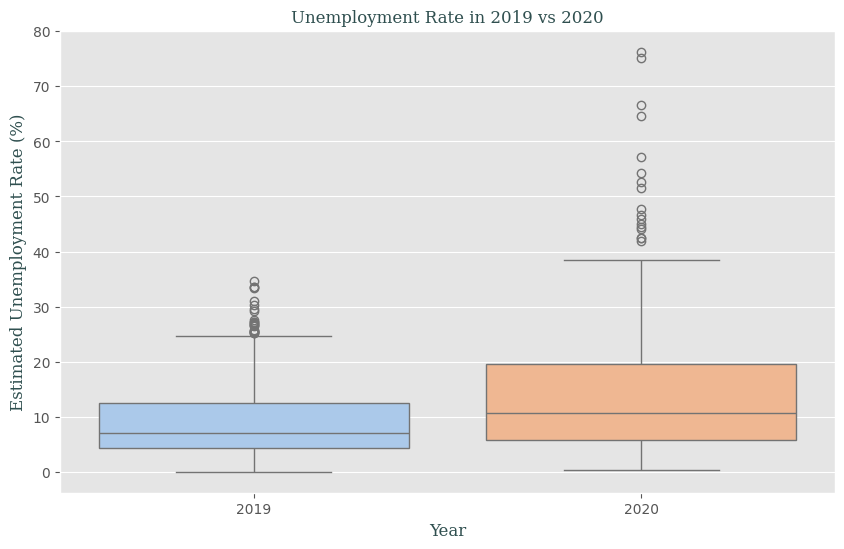

In [24]:
# Analysing the 'Estimated Unemployment Rate' column using Boxplot for years 2019 and 2020

# Set the plot style
plt.style.use('ggplot')

# Create the boxplot with improved color scheme
sns.boxplot(y=df[df.columns[3]], x=df[df.columns[1]], palette='pastel')

# Define font properties for labels and title
fontProperties = {'family': 'serif', 'color': 'darkslategray', 'weight': 'normal', 'size': 12}

# Set the labels and title with the defined font properties
plt.xlabel('Year', fontdict=fontProperties)
plt.ylabel('Estimated Unemployment Rate (%)', fontdict=fontProperties)
plt.title('Unemployment Rate in 2019 vs 2020', fontdict=fontProperties)

# Display the plot
plt.show()


- *Due to the lockdown imposed in the wake of Covid-19 pandemic, there was sudden increase in the Unemployment Rate in 2020.*

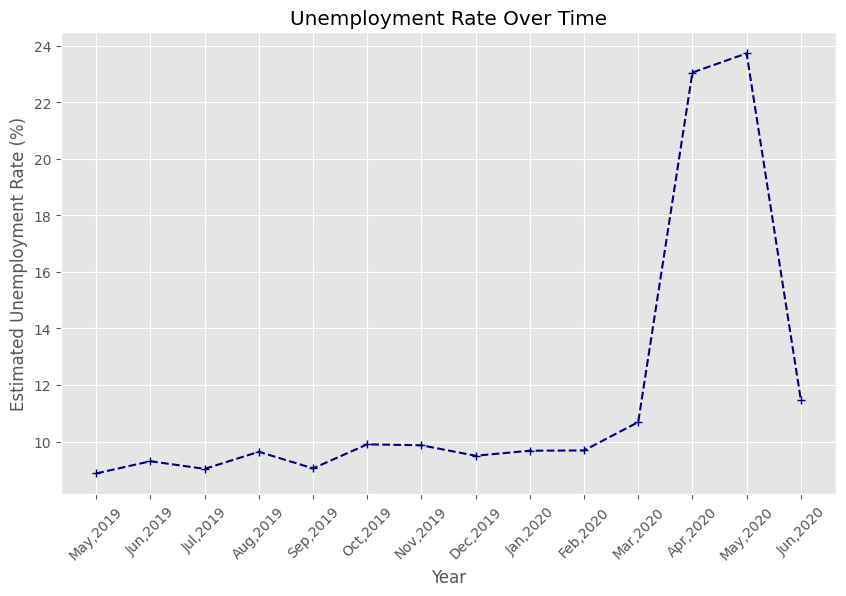

In [25]:
# Calculate the mean unemployment rate for each month
MeanUnemployment = df.groupby(['Year', 
                               'Month'])[df.columns[3]].mean().reset_index().dropna()
# For Plottiing Purposes...
MeanUnemployment['Year-Month'] = MeanUnemployment.apply(lambda row: f"{row['Month']},{row['Year']}", axis=1)

# Creating a line plot
plt.plot(MeanUnemployment['Year-Month'], 
         MeanUnemployment[df.columns[3]], 
         marker='+', linestyle='--', color='navy') 
plt.xlabel('Year')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


- *The plot reveals periods of particularly high unemployment rates, exceeding 20%, starting in March and ending in Jun of 2020.*

In [26]:
# Bar plot of average Unemployment Rate by State

df_unemp = df[[df.columns[3], df.columns[0]]].groupby(df.columns[0]).mean().reset_index()
df_unemp = df_unemp.sort_values(df.columns[3])
fig = px.bar(df_unemp, x=df.columns[0], y=df.columns[3], color=df.columns[0],
             labels={df.columns[0] : 'States', df.columns[3] : 'Average Unemployment Rate (%)'},
             title='Average Unemployment Rate in each State:', template='plotly_white')
fig.show()

*Overall unemployment rate was high for*
- Tripura
- Haryana
- Jharkhand
- Bihar

*Overall Lowest unemployment rate was for*
- Meghalaya
- Odisha
- Assam
- Utarakhand

In [27]:
# Box plot of Unemployment Rate by State

fig = px.box(df, x=df.columns[0], y=df.columns[3], color=df.columns[0],
             labels={df.columns[0] : 'States', df.columns[3] : 'Unemployment Rate (%)'},
             title='Unemployment Rate Per States', template='plotly')

fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [28]:
# Box plot of Unemployment Rate by Region

fig = px.box(df, x=df.columns[6], y=df.columns[3], color=df.columns[6],
             labels={df.columns[6] : 'Regions', df.columns[3] : 'Unemployment Rate (%)'},
             title='Unemployment Rate Per Region', template='plotly')

fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

- *These box plots show extreme variablity in the unemployment rate for all the sates  and region especially in one side (skewed).*

### Labour Rate

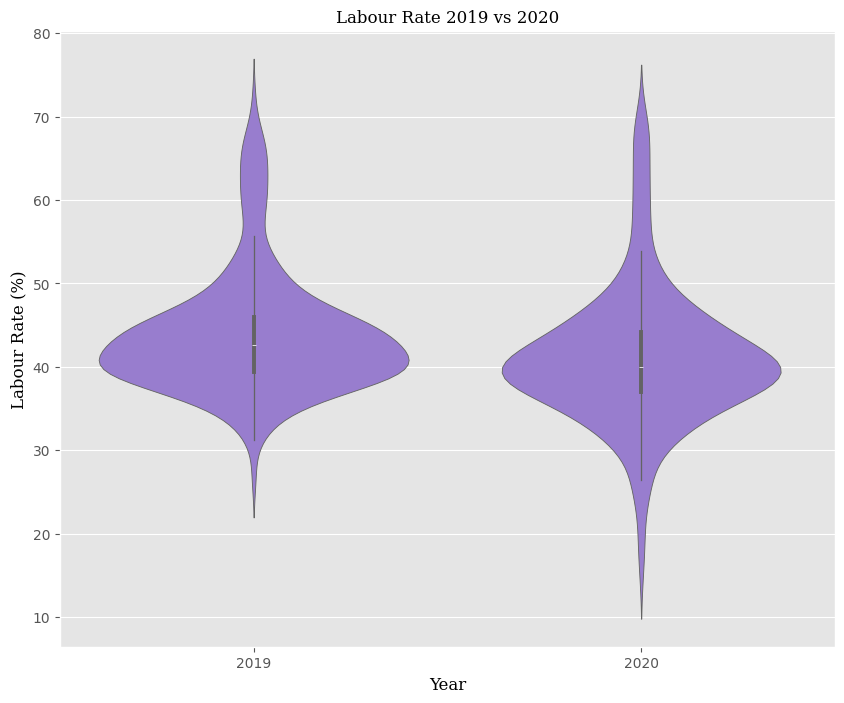

In [29]:
# Analyze the 'Labour Rate' column with a Violin Plot
plt.figure(figsize=(10, 8)) 

# Create the violin plot
sns.violinplot(y=df[df.columns[4]], x=df[df.columns[1]], color='mediumpurple')

# Customize font properties
font = {'family': 'serif', 'color': 'Black', 'weight': 'normal', 'size': 12}
plt.xlabel('Year', fontdict=font)
plt.ylabel('Labour Rate (%)', fontdict=font)
plt.title('Labour Rate 2019 vs 2020', fontdict=font)

# Displaying the plot
plt.show()


- *Labour Rate shows high variablity in 2020 due to the lockdown in wake of Covid 19.*

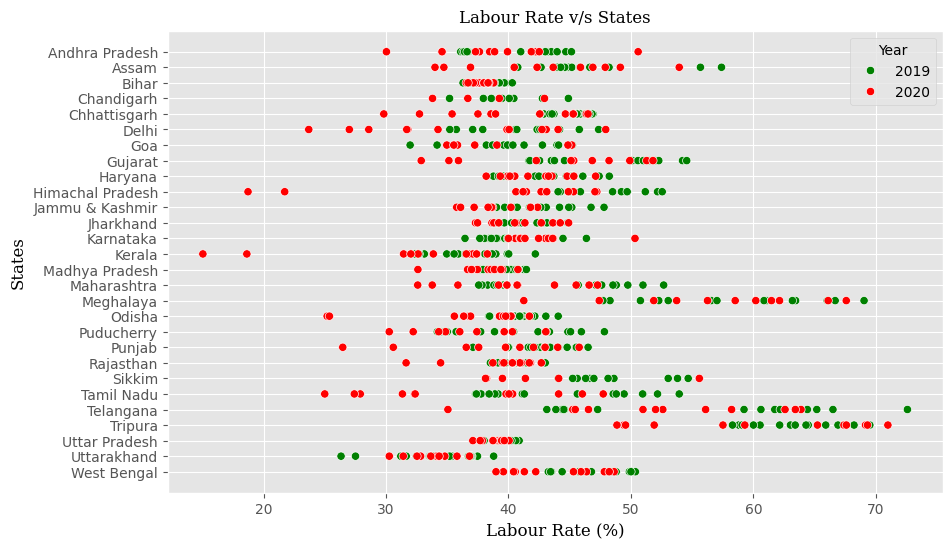

In [30]:
# Scatter plot of labour Rate by State
plt.style.use('ggplot')
sns.scatterplot(x = df[df.columns[4]], y = df[df.columns[0]], hue = df[df.columns[1]], palette =['green','red'])

font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 12}
plt.xlabel('Labour Rate (%)', fontdict=font)
plt.ylabel('States', fontdict=font)
plt.title('Labour Rate v/s States', fontdict=font)
plt.show()

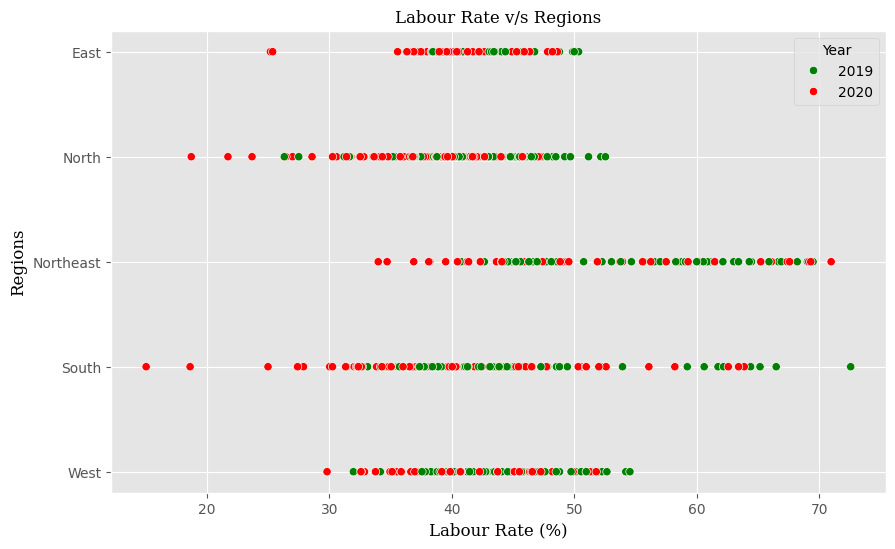

In [31]:
# Scatter plot of labour Rate by Region
plt.style.use('ggplot')
sns.scatterplot(x = df[df.columns[4]], y = df[df.columns[6]],
            hue = df[df.columns[1]], palette =['green','red'])

font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 12}
plt.xlabel('Labour Rate (%)', fontdict=font)
plt.ylabel('Regions', fontdict=font)
plt.title('Labour Rate v/s Regions', fontdict=font)
plt.show()

- *The Labour Rate is shwoing decreasing tendecy during 2020 for all the states and regions, as red dots are a little left shifted*

In [32]:
# Bar plot of average Labour Rate by States

df_lr = df[[df.columns[4], df.columns[0]]].groupby(df.columns[0]).mean().reset_index()
df_lr = df_lr.sort_values(df.columns[4])
fig = px.bar(df_lr, x=df.columns[0], y=df.columns[4], color=df.columns[0],
             labels={df.columns[0] : 'States', df.columns[4]: 'Labour Rate (%)'},
             title='Average Labour Rate in each States', template='gridon')
fig.show()

In [33]:
# Bar plot of average Labour Rate by Region

df_lr = df[[df.columns[4], df.columns[6]]].groupby(df.columns[6]).mean().reset_index()
df_lr = df_lr.sort_values(df.columns[4])
fig = px.bar(df_lr, x=df.columns[6], y=df.columns[4], color=df.columns[6],
             labels={df.columns[6] : 'Regions', df.columns[4]: 'Labour Rate (%)'},
             title='Average Labour Rate in each Regions', template='gridon')
fig.show()

- *The Labour Rate did not vary much, neither across States nor Regions (Although Northeast has a significant lead)*

### People Employed

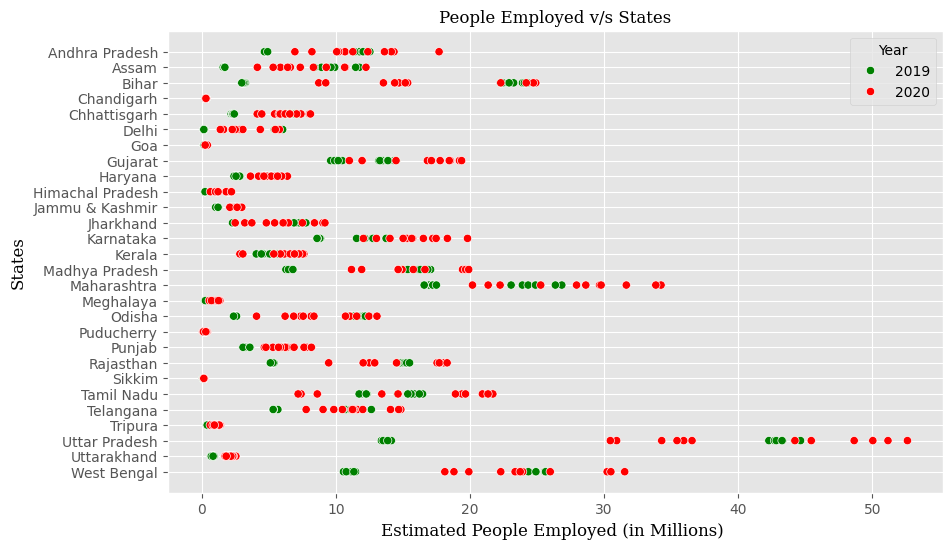

In [34]:
# Scatter plot of People Employed by State
plt.style.use('ggplot')
sns.scatterplot(x = df[df.columns[5]], y = df[df.columns[0]], hue = df[df.columns[1]], palette =['green','red'])

font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 12}
plt.xlabel('Estimated People Employed (in Millions) ', fontdict=font)
plt.ylabel('States', fontdict=font)
plt.title('People Employed v/s States', fontdict=font)
plt.show()

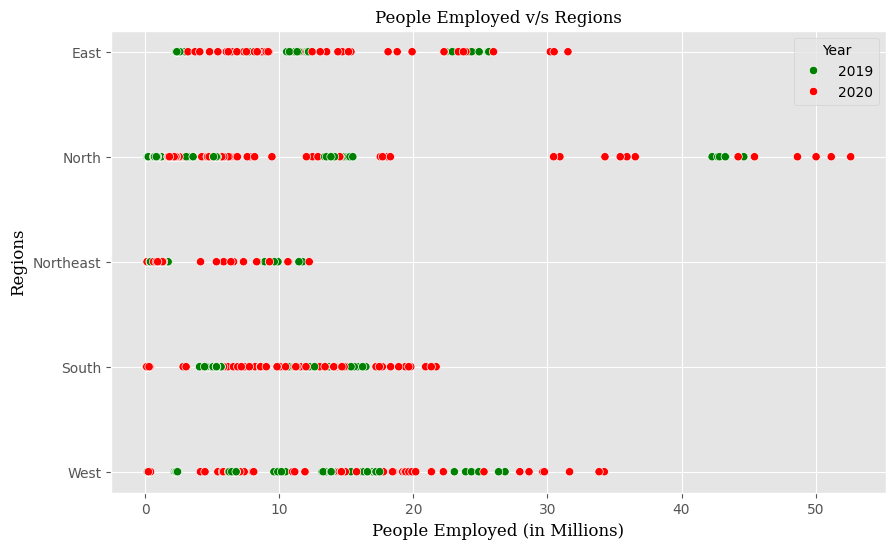

In [35]:
# Scatter plot of labour Rate by Region
plt.style.use('ggplot')
sns.scatterplot(x = df[df.columns[5]], y = df[df.columns[6]],
            hue = df[df.columns[1]], palette =['green','red'])

font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 12}
plt.xlabel('People Employed (in Millions)', fontdict=font)
plt.ylabel('Regions', fontdict=font)
plt.title('People Employed v/s Regions', fontdict=font)
plt.show()

- *Estimated no of People Employed was more during 2020 for all the states and regions, as red dots are a little right shifted...*


- *This can be due to more people entering the job market, thus even though jobs were decreasing and unemployement was high, more people were employed in 2020 as compared to 2019*

In [36]:
# Bar plot of average People Employed by States

df_lr = df[[df.columns[5], df.columns[0]]].groupby(df.columns[0]).mean().reset_index()
df_lr = df_lr.sort_values(df.columns[5])
fig = px.bar(df_lr, x=df.columns[0], y=df.columns[5], color=df.columns[0],
             labels={df.columns[0] : 'States', df.columns[5]: 'People Employed (in Millions)'},
             title='Average No. of People Employed in each State', template='gridon')
fig.show()

In [37]:
# Bar plot of average Labour Rate by Region

df_lr = df[[df.columns[5], df.columns[6]]].groupby(df.columns[6]).mean().reset_index()
df_lr = df_lr.sort_values(df.columns[5])
fig = px.bar(df_lr, x=df.columns[6], y=df.columns[5], color=df.columns[6],
             labels={df.columns[6] : 'Regions', df.columns[5]: 'People Employed (in Millions)'},
             title='Average No. of People Employed in each Regions', template='gridon')
fig.show()

- *The No of people did vary, across States and Regions*
- *More Populous States and Region have more people employed, which is mandates proportional metrics like Labour Rate*

### Region

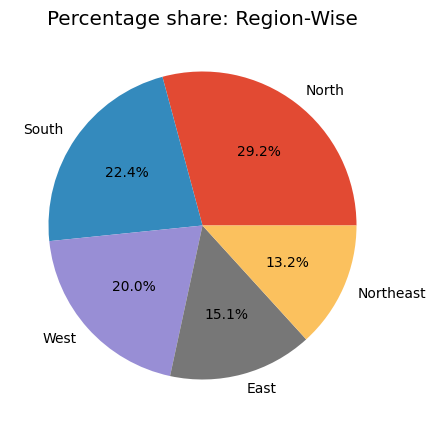

In [38]:
# Pie chart for Region count

plt.figure(figsize=[6, 5])
plt.pie(df[df.columns[6]].value_counts(), labels=df[df.columns[6]].value_counts().index, autopct='%1.1f%%')
plt.title('Percentage share: Region-Wise')
plt.show()

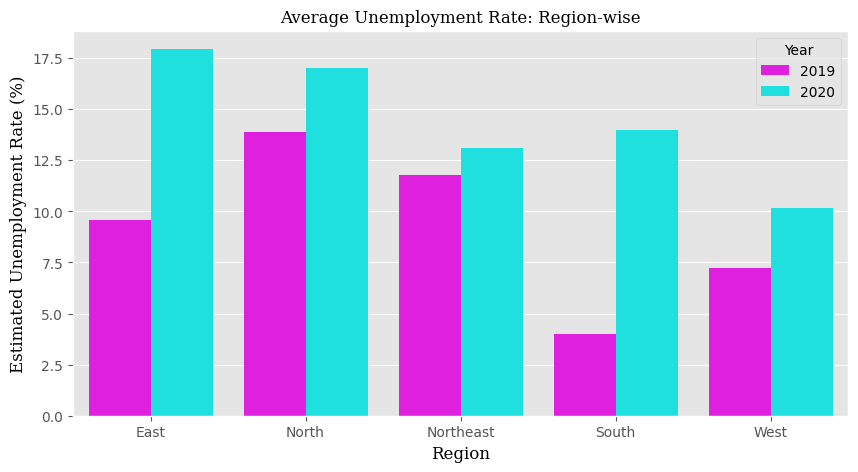

In [39]:
# Mean Unemploymnet rate in each Region for 2019 vs 2020

plt.figure(figsize = [10,5])
plte ={2019: "Magenta", 2020: "cyan"}
sns.barplot(data = df, x = df.columns[6], y=df.columns[3], 
            estimator='mean', hue=df.columns[1], errorbar=None,palette=plte)

font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 12}
plt.xlabel(df.columns[6], fontdict=font)
plt.ylabel('Estimated Unemployment Rate (%)', fontdict=font)
plt.title('Average Unemployment Rate: Region-wise', fontdict=font)
plt.show()

In [40]:
# Average Unemployment Rate in each Region

df_ar_unemp = df[[df.columns[3], df.columns[6]]].groupby(df.columns[6]).mean().reset_index()
df_ar_unemp = df_ar_unemp.sort_values(df.columns[3])
fig = px.bar(df_ar_unemp, x=df.columns[6], y=df.columns[3], color=df.columns[6],
             labels={df.columns[6]: 'Region', df.columns[3] : 'Average Unemployment Rate (%)'},
             title='Average Unemployment Rate in each Region', template='gridon')
fig.show()

### Areatype

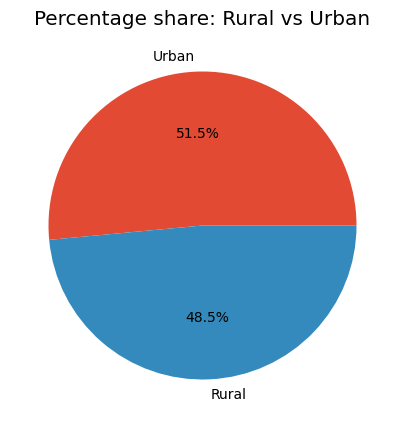

In [41]:
# Pie chart for Rural and Urban count

plt.figure(figsize=[6, 5])
plt.pie(df[df.columns[7]].value_counts(), 
        labels=df[df.columns[7]].value_counts().index, 
        autopct='%1.1f%%')
plt.title('Percentage share: Rural vs Urban')
plt.show()

- *This shows the dataset was taken almost equally from both urban and rural areas*

In [42]:
# Average Unemployment Rate in each Areatype

df_ar_unemp = df[[df.columns[3], df.columns[7]]].groupby(df.columns[7]).mean().reset_index()
df_ar_unemp = df_ar_unemp.sort_values(df.columns[3])
fig = px.bar(df_ar_unemp, x=df.columns[7], y=df.columns[3], color=df.columns[7],
             labels={df.columns[7]: 'Areatype', df.columns[3] : 'Average Unemployment Rate (%)'},
             title='Average Unemployment Rate in each Areatype', template='gridon')
fig.show()

- *The Mean Unemployment Rate was higher for Urban areas*

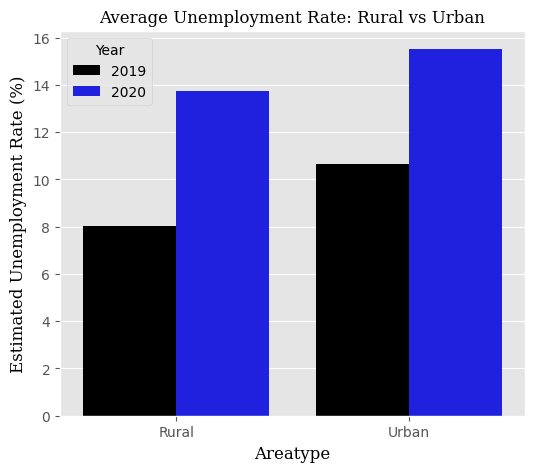

In [43]:
# Mean Unemploymnet rate in each Areatype for 2019 vs 2020

plt.figure(figsize = [6,5])
plte ={2019: "black", 2020: "blue"}
sns.barplot(data = df, x = df.columns[7], y=df.columns[3], 
            estimator='mean', hue='Year', errorbar=None, palette=plte)

font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 12}
plt.xlabel(df.columns[7], fontdict=font)
plt.ylabel('Estimated Unemployment Rate (%)', fontdict=font)
plt.title('Average Unemployment Rate: Rural vs Urban', fontdict=font)
plt.show()

- *Both Rural and Urban areas had higher unemployment rate in 2020 than 2019.*
- *Urban areas had higher unemployment rate than rural areas.*

### Group Analysis

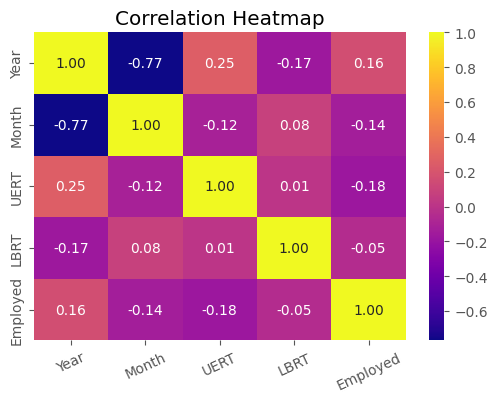

In [44]:
# Calculate correlation matrix
df_htmp= df[df.columns[1:6]]
df_htmp[df.columns[2]] = getMonthNo(df[df.columns[2]])
htmp = df_htmp.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(htmp, annot=True, cmap='plasma', fmt='.2f')
plt.xticks(rotation=25)
plt.title('Correlation Heatmap')
plt.show()

- *When unemployment rates go up, the number of employed people tends to go down, showing an opposite relationship.*
- *The effect of year on unemployment in this dataset is clear from the correlation coeeficient.*



In [45]:
# Scatter matrix cosidering the employed and unemployed rates

fig = px.scatter_matrix(df, template='plotly',
                        dimensions=df.columns[3:6],
                        color=df.columns[1])
fig.show()

*The plot shows No Clear Pattern*

### Impact of Lockdown (State-wise, Region-wise, Areatype-wise)

In [46]:
# Creating new dataframes for before and after lockdown period during the same months
MM = df[df.columns[2]]
YYYY = df[df.columns[1]]
before_lockdown = df[(MM >= 'Apr') & (MM <= 'Jun') & (YYYY ==2019)]
after_lockdown = df[(MM >= 'Apr') & (MM <= "Jun") & (YYYY ==2020)]

#### State

In [47]:
# Calculating the mean unemployment rate before lockdown by state
MeanUnemploymentBeforeLockdown = before_lockdown.groupby(df.columns[0])\
    [df.columns[3]].mean().reset_index()

# Calculating the mean unemployment rate after lockdown by state
MeanUnemploymentAfterLockdown = after_lockdown.groupby(df.columns[0])\
    [df.columns[3]].mean().reset_index()

# Combining the mean unemployment rates before and after lockdown by state
BeforeAndAfterLockdown = pd.merge(MeanUnemploymentBeforeLockdown, 
                                  MeanUnemploymentAfterLockdown, 
                                  on=df.columns[0])

# Renaming columns for clarity
BeforeAndAfterLockdown.columns = ['States', 
                                  'Unemployment Rate Before Lockdown', 
                                  'Unemployment Rate After Lockdown']

# Ensuring the unemployment rates are of float type
BeforeAndAfterLockdown[BeforeAndAfterLockdown.columns[1:]].dtype = float

# Displaying the first few rows of the refined DataFrame
BeforeAndAfterLockdown.head()


,States,Unemployment Rate Before Lockdown,Unemployment Rate After Lockdown
0,Andhra Pradesh,4.1475,14.764167
1,Assam,6.7825,6.330000
2,Bihar,13.1650,36.897500
3,Chandigarh,15.3750,7.220000
4,Chhattisgarh,9.5300,12.113333


In [48]:
# Percentage change in unemployment rate

BeforeAndAfterLockdown['PCT Change in UER'] = (BeforeAndAfterLockdown \
    [BeforeAndAfterLockdown.columns[1:]].pct_change(axis=1) \
        [BeforeAndAfterLockdown.columns[2]]*100).round(-1)
BeforeAndAfterLockdown = BeforeAndAfterLockdown.sort_values('PCT Change in UER')
BeforeAndAfterLockdown.head()

,States,Unemployment Rate Before Lockdown,Unemployment Rate After Lockdown,PCT Change in UER
3,Chandigarh,15.3750,7.220000,-50.0
1,Assam,6.7825,6.330000,-10.0
24,Tripura,29.0425,27.101667,-10.0
21,Sikkim,7.9800,7.195000,-10.0
10,Jammu & Kashmir,16.9475,14.925000,-10.0


In [49]:
# Percentage change in unemployment after lockdown
'''After Removing the Outliers Tamil Nadu and Puducherry'''
fig = px.bar(BeforeAndAfterLockdown.iloc[:26,:], x=BeforeAndAfterLockdown.columns[0],
             y=BeforeAndAfterLockdown.columns[3],color=BeforeAndAfterLockdown.columns[3],
            labels={BeforeAndAfterLockdown.columns[0] : 'States', 
                    BeforeAndAfterLockdown.columns[3] : '% Change in Unemployment'},
            title='% Change in Unemployment Rate from 2019 to 2020 for Apr-Jun ',
            color_continuous_scale = 'viridis', width=900, height=500)
fig.show()

In [50]:
# Bar for Tamil Nadu & Puducherry
fig = px.bar(BeforeAndAfterLockdown.iloc[26:,:], 
             x=BeforeAndAfterLockdown.columns[0],
             y=BeforeAndAfterLockdown.columns[3],
             color=BeforeAndAfterLockdown.columns[3],
            labels={BeforeAndAfterLockdown.columns[0] : 'States', 
                    BeforeAndAfterLockdown.columns[3] : '% Change in Unemployment'},
            title='% Change in Unemployment Rate from 2019 to 2020 for Apr-Jun ',
            color_continuous_scale = 'viridis', width=900, height=500)
fig.show()

#### Region

In [51]:
# Calculating the mean unemployment rate before lockdown by region
MeanUnemploymentBeforeLockdownByRegion = before_lockdown.groupby(df.columns[6])\
    [df.columns[3]].mean().reset_index()

# Calculating the mean unemployment rate after lockdown by region
MeanUnemploymentAfterLockdownByRegion = after_lockdown.groupby(df.columns[6])\
    [df.columns[3]].mean().reset_index()

# Combining the mean unemployment rates before and after lockdown by region
BeforeAndAfterLockdownByRegion = pd.merge(MeanUnemploymentBeforeLockdownByRegion, 
                                          MeanUnemploymentAfterLockdownByRegion, 
                                          on=df.columns[6])

# Renaming columns for clarity
BeforeAndAfterLockdownByRegion.columns = ['Region', 
                                          'Unemployment Rate Before Lockdown', 
                                          'Unemployment Rate After Lockdown']

# Ensuring the unemployment rates are of float type
BeforeAndAfterLockdownByRegion[BeforeAndAfterLockdownByRegion.columns[1:]].dtype = float

# Displaying the first few rows of the refined DataFrame
BeforeAndAfterLockdownByRegion.head()


,Region,Unemployment Rate Before Lockdown,Unemployment Rate After Lockdown
0,East,9.183125,26.716458
1,North,13.005625,18.984333
2,Northeast,13.122143,12.832143
3,South,3.528750,23.881176
4,West,6.821818,13.666964


In [52]:
# Percentage change in unemployment rate

BeforeAndAfterLockdownByRegion['PCT Change in UER'] = (BeforeAndAfterLockdownByRegion \
    [BeforeAndAfterLockdownByRegion.columns[1:]].pct_change(axis=1)\
    [BeforeAndAfterLockdownByRegion.columns[2]]*100).round(-1)
BeforeAndAfterLockdownByRegion = BeforeAndAfterLockdownByRegion.sort_values('PCT Change in UER')
BeforeAndAfterLockdownByRegion.head()

,Region,Unemployment Rate Before Lockdown,Unemployment Rate After Lockdown,PCT Change in UER
2,Northeast,13.122143,12.832143,-0.0
1,North,13.005625,18.984333,50.0
4,West,6.821818,13.666964,100.0
0,East,9.183125,26.716458,190.0
3,South,3.528750,23.881176,580.0


In [53]:
# Percentage change in unemployment after lockdown
fig = px.bar(BeforeAndAfterLockdownByRegion, 
             x=BeforeAndAfterLockdownByRegion.columns[0],
             y=BeforeAndAfterLockdownByRegion.columns[3],
             color=BeforeAndAfterLockdownByRegion.columns[3],
            labels={BeforeAndAfterLockdownByRegion.columns[0] : 'Region', 
                    BeforeAndAfterLockdownByRegion.columns[3] : '% Change in Unemployment'},
            title='% Change in Unemployment Rate from 2019 to 2020 for Apr-Jun ',
            color_continuous_scale = 'viridis', width=900, height=500)
fig.show()

- *The plot shows that in Regions Northeast was least affected in terms of Unemplyement Rates as compared to others, like South which was highly affected by Covid-19*

#### Areatype

In [54]:
# Calculating the mean unemployment rate before lockdown by Areatype
MeanUnemploymentBeforeLockdownByAreatype = before_lockdown.groupby(df.columns[7])\
    [df.columns[3]].mean().reset_index()

# Calculating the mean unemployment rate after lockdown by Areatype
MeanUnemploymentAfterLockdownByAreatype = after_lockdown.groupby(df.columns[7])\
    [df.columns[3]].mean().reset_index()

# Combining the mean unemployment rates before and after lockdown by Areatype
BeforeAndAfterLockdownByAreatype = pd.merge(MeanUnemploymentBeforeLockdownByAreatype, 
                                            MeanUnemploymentAfterLockdownByAreatype, 
                                            on=df.columns[7])

# Renaming columns for clarity
BeforeAndAfterLockdownByAreatype.columns = ['Areatype', 
                                            'Unemployment Rate Before Lockdown', 
                                            'Unemployment Rate After Lockdown']

# Ensuring the unemployment rates are of float type
BeforeAndAfterLockdownByAreatype[BeforeAndAfterLockdownByAreatype.columns[1:]].dtype = float

# Displaying the first few rows of the refined DataFrame
BeforeAndAfterLockdownByAreatype.head()


,Areatype,Unemployment Rate Before Lockdown,Unemployment Rate After Lockdown
0,Rural,7.634615,18.412867
1,Urban,10.439107,20.501753


In [55]:
# Percentage change in unemployment rate

BeforeAndAfterLockdownByAreatype['PCT Change in UER'] = (BeforeAndAfterLockdownByAreatype\
    [BeforeAndAfterLockdownByAreatype.columns[1:]].pct_change(axis=1)\
        [BeforeAndAfterLockdownByAreatype.columns[2]]*100).round(-1)
BeforeAndAfterLockdownByAreatype = BeforeAndAfterLockdownByAreatype.sort_values('PCT Change in UER')
BeforeAndAfterLockdownByAreatype.head()

,Areatype,Unemployment Rate Before Lockdown,Unemployment Rate After Lockdown,PCT Change in UER
1,Urban,10.439107,20.501753,100.0
0,Rural,7.634615,18.412867,140.0


In [56]:
# Percentage change in unemployment after lockdown
fig = px.bar(BeforeAndAfterLockdownByAreatype, 
             x=BeforeAndAfterLockdownByAreatype.columns[0],
             y=BeforeAndAfterLockdownByAreatype.columns[3],
             color=BeforeAndAfterLockdownByAreatype.columns[3],
            labels={BeforeAndAfterLockdownByAreatype.columns[0] : 'Areatype', 
                    BeforeAndAfterLockdownByAreatype.columns[3] : '% Change in Unemployment'},
            title='% Change in Unemployment Rate from 2019 to 2020 for Apr-Jun ',
            color_continuous_scale = 'viridis', width=900, height=500)
fig.show()

- *The plot shows that Urban Areas werer less affected in terms of Unemplyement Rates as compared to Rural Areas, this maybe attributed to the other factors reducing Employement in Urban Centres such Overpopulation, Skill Issue, Less Jobs etc*

#

#

#

#

## **Conclusion**

### *Most impacted States/Union Territories*

- Puducherry
- Jharkhand
- Bihar
- Haryana
- Tamil Nadu

### *Most impacted Regions*

- Southern Region
- Eastern Region
- Western Region
- Northern Region
